In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
from matplotlib.patches import Ellipse

In [5]:
ctx = straxbra.XebraContext()

In [6]:
run = '00163'
peaks_data = ctx.get_array(run, 'peaks')
position_data = ctx.get_array(run, 'peak_positions')

In [7]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]
area_per_channel = peaks_data['area_per_channel']
x_position = position_data['x']
y_position = position_data['y']

In [8]:
def CutCondition(waveform):
    
    maximum = max(waveform)
    FirstPeak_area = sum(waveform[:15]) # range in samples (not ns!)
    SecondPeak_area = sum(waveform[15:]) # range in samples (not ns!)

    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True)
    else:
        return(False)
    

In [9]:
def drifttime_to_z(t):
    return a * t + b

In [10]:
def S2_found(waveform, integral, width):
#     maximum_S2 = max(waveform)
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [11]:
def Process(waveform, i):
    CutFlag = CutCondition(waveform[i])
    if CutFlag == True:
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and S2_found(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]) == False: 
            j += 1
            counter_timestamp = timestamp[i+j]
        else:         
            if S2_found(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]):
                S2_area_raw.append(integral[i+j])
                S1_area_raw.append(integral[i])
                
                k=1 
                s2_counter_timestamp = timestamp[i+j+k]
                while threshold_timestamp >= s2_counter_timestamp and S2_found(waveform = waveform[i+j],integral = integral[i+j+k], width = width[i+j+k]) == False:
                    k += 1
                    s2_counter_timestamp = timestamp[i+j+k]
                else:

                    if threshold_timestamp <= s2_counter_timestamp:
                        
                        s1_41keV_area.append(integral[i])
                        s1_41keV_width.append(width[i]) 
                        s2_41keV_area.append(integral[i+j])
                        s2_41keV_width.append(width[i+j])

                        
                        if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                            and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                            and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                            and area_per_channel[i+j][7] > 0 \
                            :
                            
                            S2_area_PMT_cut.append(integral[i+j])
                            S1_area_PMT_cut.append(integral[i])
                            
                            r_position = np.sqrt(x_position[i+j]**2 + y_position[i+j]**2)
                            z_position = drifttime_to_z(timestamp[i+j] - timestamp[i])
                            if r_position <= fiducial_r and z_position >= -75:
                                S2_area_r_cut.append(integral[i+j])
                                S1_area_r_cut.append(integral[i])   
                return
            else:
                return

In [12]:
left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 21

num = len(waveform)

S1_area_raw = []
S2_area_raw = []

s1_41keV_area = []
s1_41keV_width = []
s2_41keV_area = []
s2_41keV_width = []


S1_area_PMT_cut = []
S2_area_PMT_cut = []

S1_area_r_cut = []
S2_area_r_cut = []

print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)
    
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


[[-0.99988414 -0.01522162]
 [-0.01522162  0.99988414]]
[1 0]
(49, 49)


/software/anaconda3/envs/strax/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


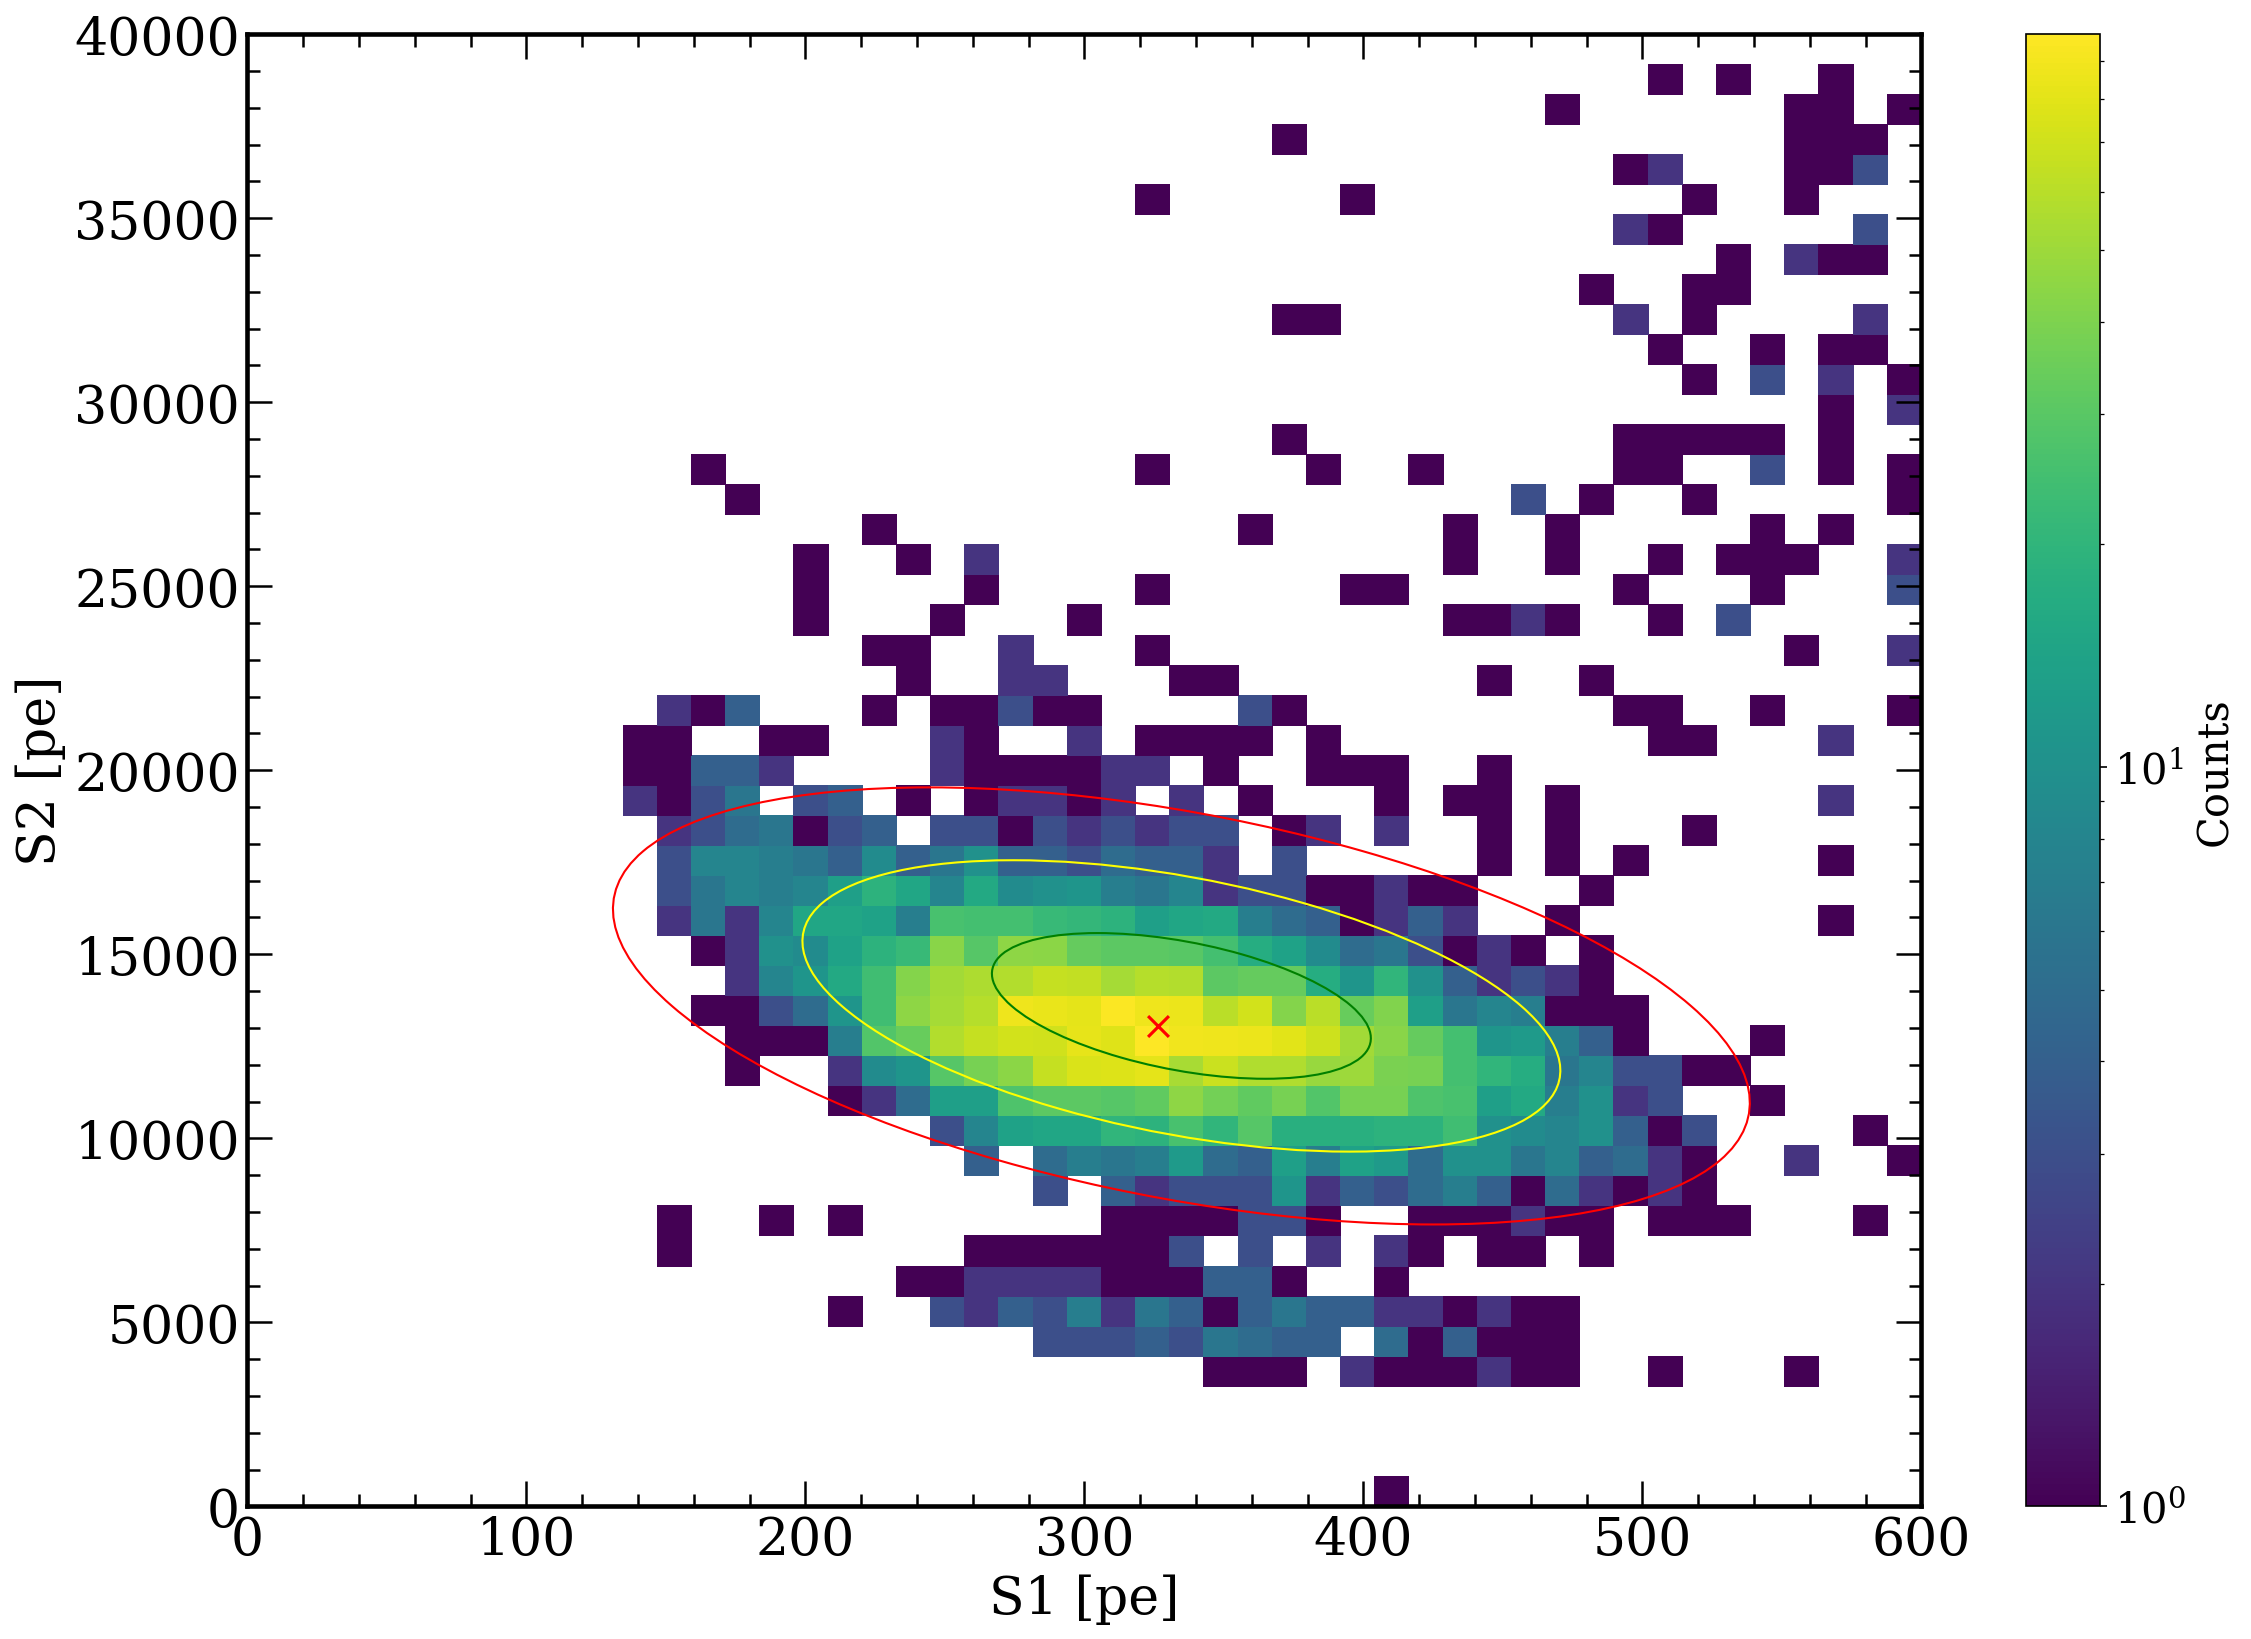

In [13]:


fig=plt.figure(figsize=(18, 13), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    print(vecs)
    order = vals.argsort()[::-1]
    print(order)
    return vals[order], vecs[:,order]

x = S1_area_r_cut
y = S2_area_r_cut
# y_mean = np.mean(y)
# x_mean = np.mean(x)

x_value = []
y_value = []

for i in range(len(y)):
    if y[i] > 7000 and y[i] < 20000:
        x_value.append(x[i])
        y_value.append(y[i])

        
y_mean = np.mean(y_value)
x_mean = np.mean(x_value)

ax = plt.subplot(111)

cov = np.cov(x_value, y_value)
vals, vecs = eigsorted(cov)


nstd = [1,2,3]
colors = ['green', 'yellow', 'red']

for i in range(len(nstd)):
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd[i] * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color=colors[i])
    ell.set_facecolor('none')
    ax.add_artist(ell)

bins_x = np.linspace(0,600,50)
bins_y = np.linspace(0,40000,50)

# bins_x = np.logspace(2,2.6,100)
# bins_y = np.logspace(2,5,100)
histo_max= 2*10**3



counts, _, _ = np.histogram2d(S1_area_r_cut, S2_area_r_cut, bins=(bins_x, bins_y))
print(counts.shape)



im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=mpl.colors.LogNorm(), cmap = 'viridis')
#axes.scatter(x_value, y_value, c = 'c', s=10)
axes.scatter(x_mean, y_mean, c ='r', s=100, marker = 'x', label = 'mean')
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20) 
# axes.set_xscale('log')
# axes.set_yscale('log')
# axes.set_xlim([0,500])
# axes.set_ylim([0,50000])
axes.set_xlabel('S1 [pe]')
axes.set_ylabel('S2 [pe]')


plt.show()


In [14]:

def decay_cut(timestamp, integral, width, i):
    
    time_diff = timestamp[i+1] - timestamp[i]
    if integral[i] > 100 \
    and integral[i] < 400 \
    and width[i] < 70 \
    and width[i] > 10 \
    and time_diff   < 1000 \
    and integral[i+1]   < 200 \
    and integral[i+1]   > 40 \
    and width[i+1] < 80\
    and width[i+1] > 20\
    :    
        return True
    else:
        return False
    
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [15]:
def Process(waveform, i):
    if decay_cut(timestamp,integral, width, i):
        
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
            j += 1
            counter_timestamp = timestamp[i+j]
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):

                k=1 
                s2_counter_timestamp = timestamp[i+j+k]
                while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                    k += 1
                    s2_counter_timestamp = timestamp[i+j+k]
                else:

                    if threshold_timestamp <= s2_counter_timestamp:
                        
                        s1_32keV_area.append(integral[i])
                        s1_9keV_area.append(integral[i+1])
                        s1_32keV_width.append(width[i])
                        s1_9keV_width.append(width[i+1])
                        
                        
                        s2_32keV_area.append(integral[i+j])
                        s2_9keV_area.append(integral[i+j+1])
                        s2_32keV_width.append(width[i+j])
                        s2_9keV_width.append(width[i+j+1])
        
        
        return
    else:
        return

In [16]:
s2_32keV_area = []
s2_9keV_area = []
s2_32keV_width = []
s2_9keV_width = []

s1_32keV_area = []
s1_9keV_area = []
s1_32keV_width = []
s1_9keV_width = []
num = len(waveform)-1
print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)
    
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


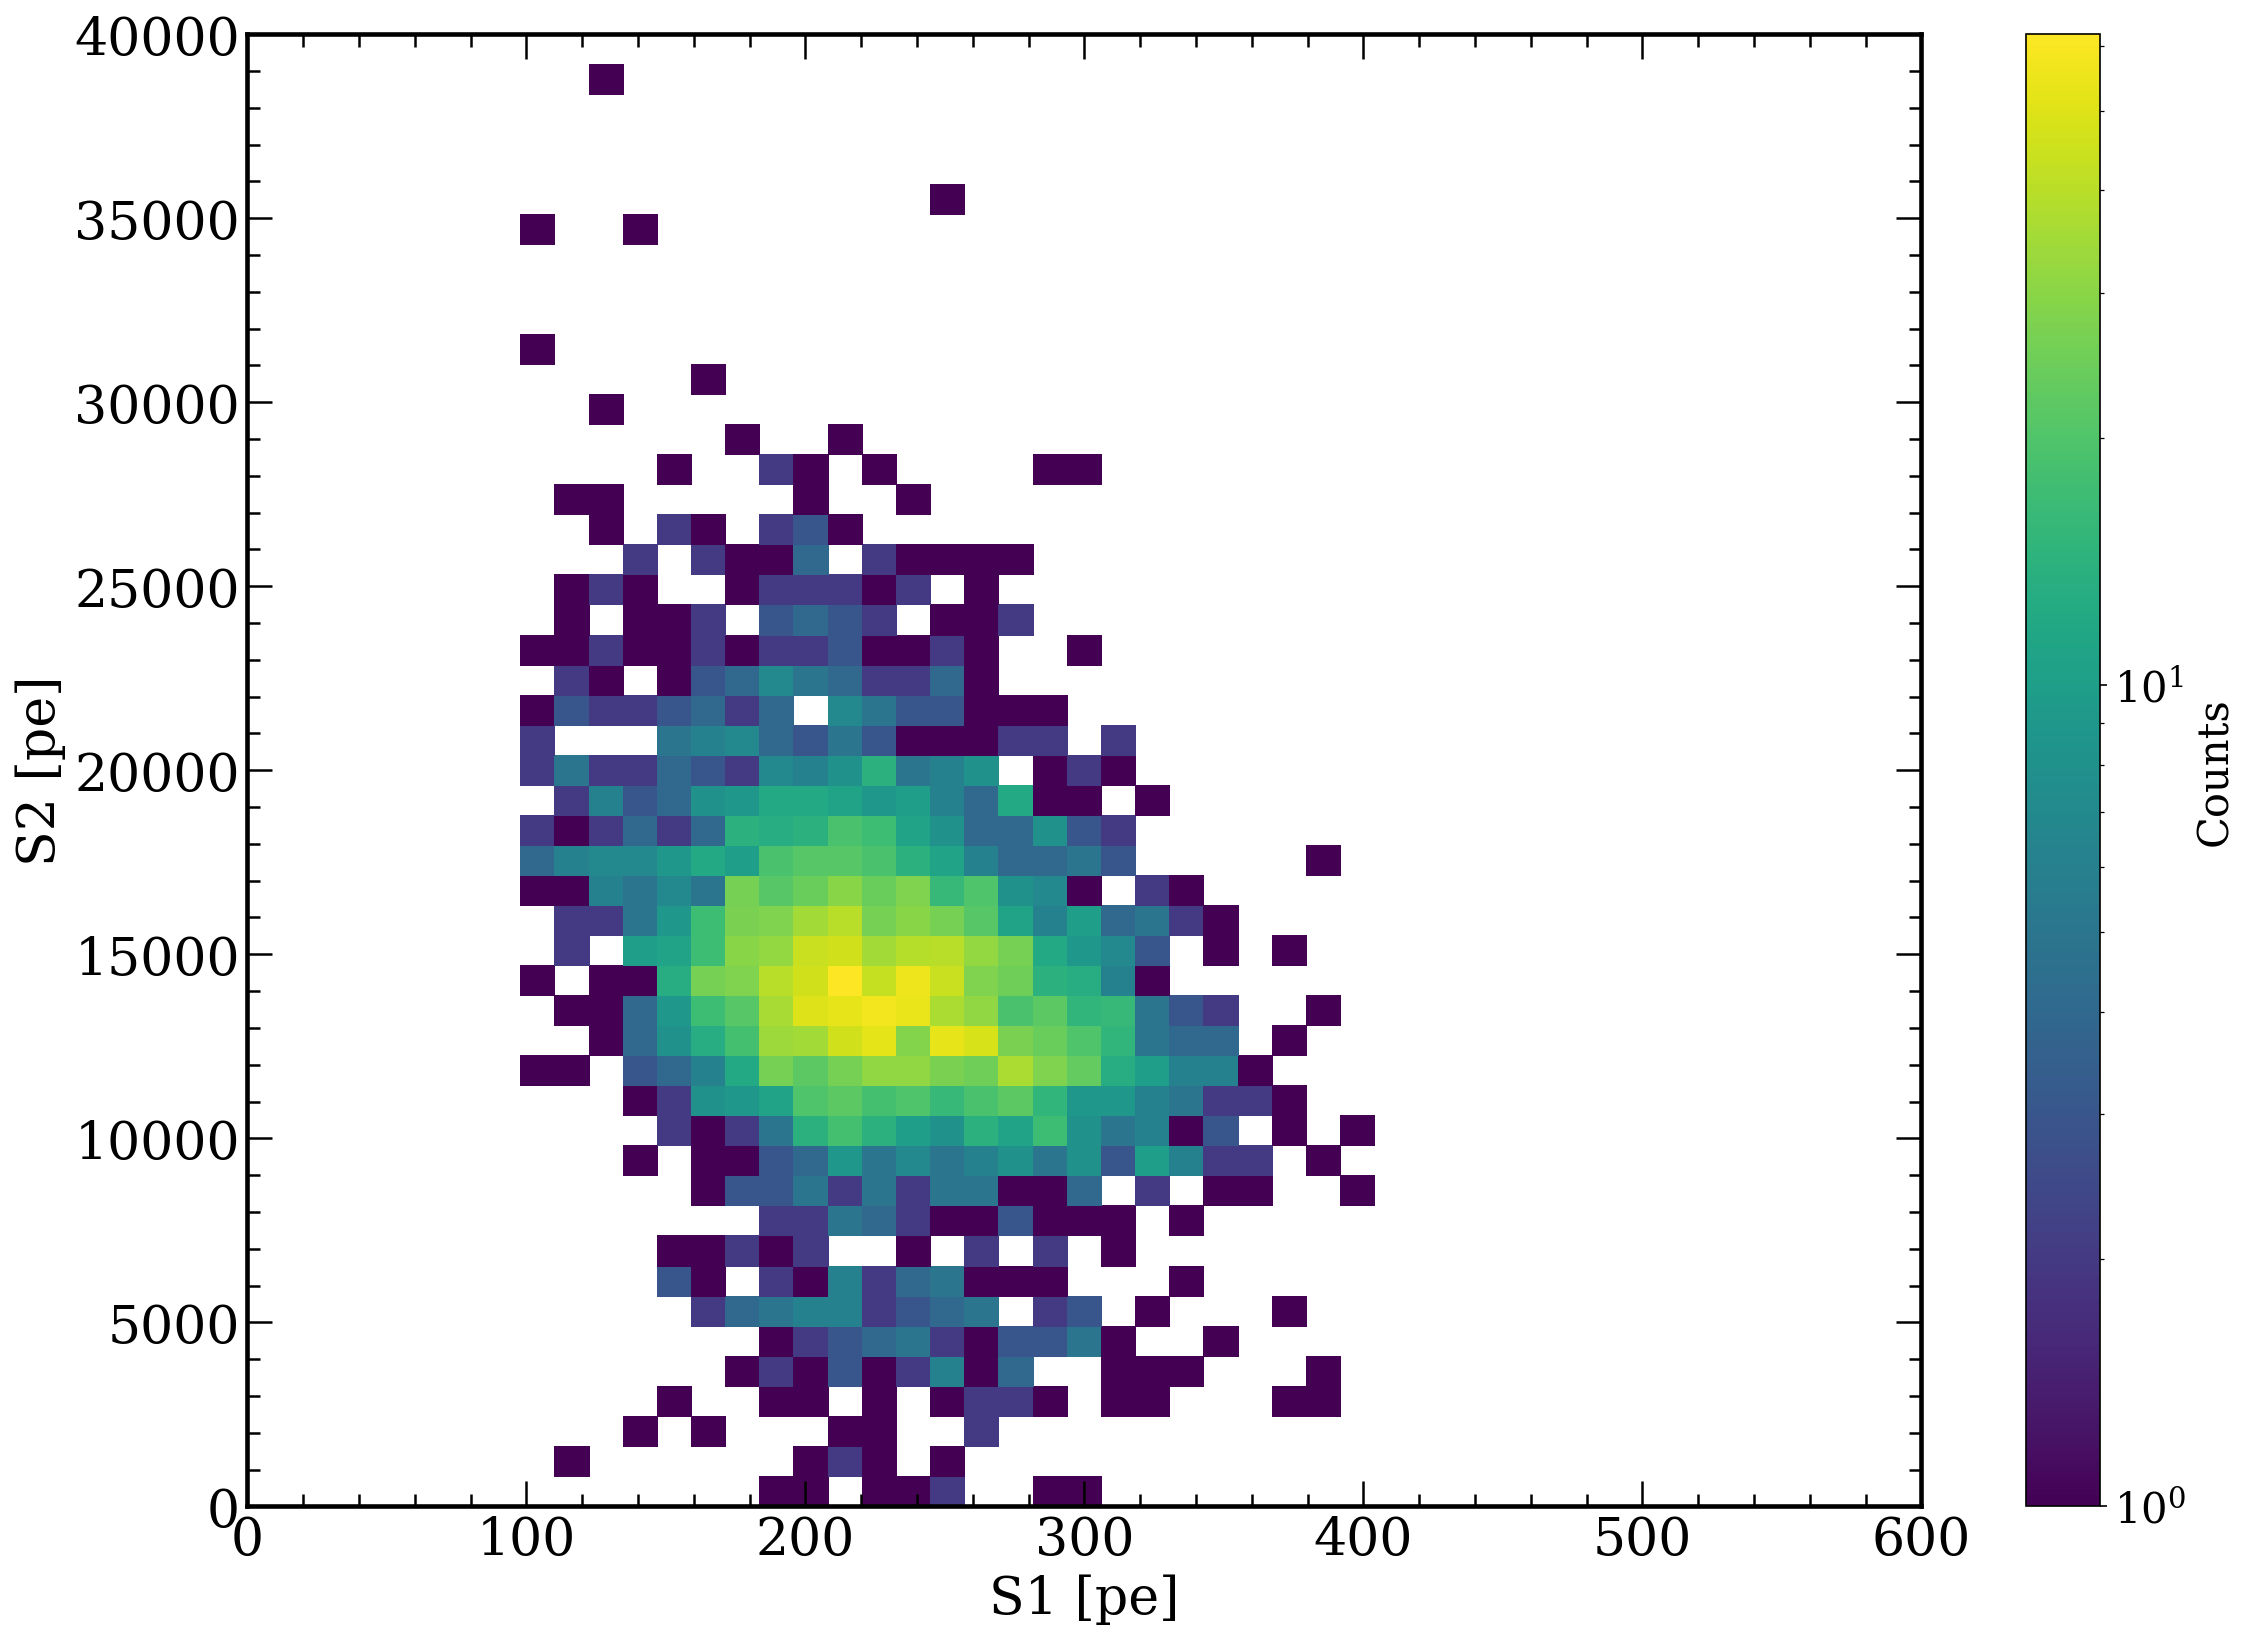

In [20]:
fig, axes = ps.styles()




bins_x = np.linspace(0,600,50)
bins_y = np.linspace(0,40000,50)

# bins_x = np.logspace(2,2.6,100)
# bins_y = np.logspace(2,5,100)
histo_max= 2*10**3



counts, _, _ = np.histogram2d(s1_32keV_area, s2_32keV_area, bins=(bins_x, bins_y))
#counts2, _, _ = np.histogram2d(s1_41keV_area, s2_41keV_area, bins=(bins_x, bins_y))



im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=mpl.colors.LogNorm(), cmap = 'viridis')
#im2 = axes.pcolormesh(bins_x, bins_y, counts2.T, norm=mpl.colors.LogNorm(), cmap = 'viridis')
#axes.scatter(x_value, y_value, c = 'c', s=10)
cb = plt.colorbar(im, ax=axes, label='Counts/bin')
#cb2 = plt.colorbar(im2, ax=axes, label='Counts/bin')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20) 
# axes.set_xscale('log')
# axes.set_yscale('log')
# axes.set_xlim([0,500])
# axes.set_ylim([0,50000])
axes.set_xlabel('S1 [pe]')
axes.set_ylabel('S2 [pe]')


plt.show()


In [ ]:
# fig, axes = ps.styles()



# S1 = []
# S2 = []

# for i in range(len(S1_area)):
#     if S1_area[i] < 400:
#         S1.append(S1_area[i])
#         S2.append(S2_area[i])
        
# # for j in range(len(S2_area)):
# #     if S2_area[j] < 3000:
# #         S2.append(S2_area[j])

# S1_cut = []
# S2_cut = []

# for j in range(len(S2)):
#     if S2[j] < 30000:
#         S1_cut.append(S1[j])
#         S2_cut.append(S2[j])

# axes.scatter(S1_cut,S2_cut)


# # axes.plot([], [], ' ', label="number of entries: "+str(len(x_positions_all['00163'])))
# # axes.set_xlabel('x position')
# # axes.set_ylabel('y position')

# # currentAxis = plt.gca()
# # circle = plt.Circle((0., 0.), 35., color='gray', linestyle = '-', fill=False)
# # currentAxis.add_artist(circle)

# # axes.set_xlim([0,4e2])
# # axes.set_ylim([500,11000])

# axes.legend(prop={'size': 18})
# axes.set_xscale('log')
# axes.set_yscale('log')
# plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    print(vecs)
    order = vals.argsort()[::-1]
    print(order)
    return vals[order], vecs[:,order]


fig, axes = ps.styles()

x = S1_area_r_cut
y = S2_area_r_cut
# y_mean = np.mean(y)
# x_mean = np.mean(x)

x_value = []
y_value = []

for i in range(len(y)):
    if y[i] > 7000 and y[i] < 20000:
        x_value.append(x[i])
        y_value.append(y[i])

        
y_mean = np.mean(y_value)
x_mean = np.mean(x_value)

nstd1 = 1

ax = plt.subplot(111)

cov = np.cov(x_value, y_value)
vals, vecs = eigsorted(cov)


nstd = [1,2,3]
colors = ['green', 'yellow', 'red']

for i in range(len(nstd)):
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd[i] * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color=colors[i])
    ell.set_facecolor('none')
    ax.add_artist(ell)
    

# theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
# w, h = 2 * nstd1 * np.sqrt(vals)
# ell1 = Ellipse(xy=(np.mean(x), np.mean(y)),
#               width=w, height=h,
#               angle=theta, color='black')
# ell1.set_facecolor('none')
# ax.add_artist(ell1)

# nstd2 = 2
# theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
# w, h = 2 * nstd2 * np.sqrt(vals)
# ell2 = Ellipse(xy=(np.mean(x), np.mean(y)),
#               width=w, height=h,
#               angle=theta, color='blue')
# ell2.set_facecolor('none')

# ax.add_artist(ell2)
print(ell)


axes.scatter(x_value, y_value, c = 'c', s=10)
axes.scatter(x_mean, y_mean, c ='r', s=100, marker = 'x', label = 'mean')
axes.set_xlim([0,1000])
axes.set_ylim([0,30000])
# axes.set_xscale('log')
# axes.set_yscale('log')
plt.show()
print(len (x_value))

NameError: name 'ps' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

x = x_value
y = y_value

deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10

xmin = min(x) - deltaX
xmax = max(x) + deltaX

ymin = min(y) - deltaY
ymax = max(y) + deltaY

print(xmin, xmax, ymin, ymax)

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
#ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.scatter(x, y, c = 'c', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

In [ ]:
plt.figure(figsize=(8,8))
for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'Cluster{j}, level{ii}')
plt.legend()

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

if __name__ == '__main__':
    #-- Example usage -----------------------
    # Generate some random, correlated data
    points = np.random.multivariate_normal(
            mean=(1,1), cov=[[0.4, 9],[9, 10]], size=1000
            )
    # Plot the raw points...
    x, y = points.T
    plt.plot(x, y, 'ro')

    # Plot a transparent 3 standard deviation covariance ellipse
    plot_point_cov(points, nstd=3, alpha=0.5, color='green')

    plt.show()
print(type(points))
print(points.shape)